In [96]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels import stats
from sklearn.linear_model import LinearRegression


In [166]:
data = pd.read_csv('data.csv')
data

,stt,Gender,Class,Grade_level,school_type,Sib,fa_job,mo_job,income,exam,...,eff_supp,eff_env,eff_obj,eff_resource,eff_friend,kno_med,kno_covid,kno_env,kno_soci,kno_elearn
0,1,1,4,1,2,2,1,2,2,5,...,5,4,3,4,4,5,5,4,3,2
1,2,2,4,1,2,3,1,2,3,5,...,2,4,3,4,4,4,4,4,4,2
2,3,1,4,1,2,2,2,2,2,2,...,2,4,3,4,2,4,4,4,4,3
3,4,2,4,1,2,2,1,2,3,2,...,3,4,4,4,4,5,5,4,3,3
4,5,3,4,1,2,2,1,2,2,5,...,2,5,4,5,3,5,5,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,421,2,4,1,3,2,3,2,3,6,...,2,1,1,4,4,1,1,4,4,4
416,422,2,6,2,1,4,3,2,6,5,...,4,4,4,3,3,4,4,4,4,4
417,423,1,6,2,1,3,4,4,2,1,...,2,3,3,4,2,3,4,3,3,3
418,424,1,1,1,3,4,1,2,1,6,...,5,5,5,5,2,5,5,5,5,5


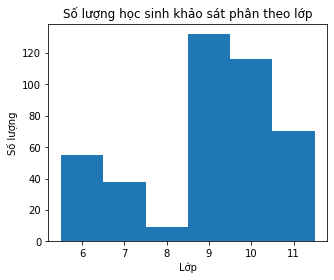

In [299]:
test = data['Class'].to_numpy()
test = test + 5
d = np.diff(np.unique(test)).min()
left_of_first_bin = test.min() - float(d)/2
right_of_last_bin = test.max() + float(d)/2
plt.rcParams["figure.figsize"] = (5,4)
y = [160, 167, 137, 18, 120, 36, 155, 130]
plt.hist(test, np.arange(left_of_first_bin, right_of_last_bin + d, d),label=True)
plt.title('Số lượng học sinh khảo sát phân theo lớp')
plt.xlabel('Lớp')
plt.ylabel('Số lượng')
plt.show()



In [301]:
stype = data.groupby(['Class']).size().reset_index(name='counts')
stype.Class = stype.Class + 5
print(stype)

   Class  counts
0      6      55
1      7      38
2      8       9
3      9     132
4     10     116
5     11      70


            Gender  counts
0              Nam     166
1               Nữ     239
2  Không công khai      15


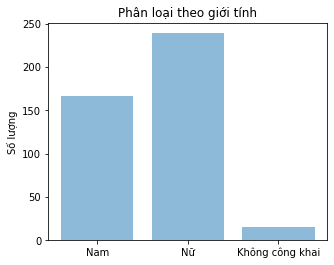

In [69]:
gender = data['Gender']

stype = data.groupby(['Gender']).size().reset_index(name='counts')
stype['Gender'] = ['Nam','Nữ','Không công khai']
print(stype)

y_pos = np.arange(len(stype.Gender))
plt.bar(y_pos, stype.counts, align='center', alpha=0.5)
plt.xticks(y_pos, stype.Gender)
plt.ylabel('Số lượng')
plt.title('Phân loại theo giới tính')

plt.show()

  school_type  counts
0        Công     186
1      Chuyên     132
2     Tư thục      94
3     Quốc tế       8


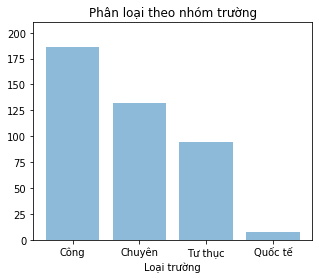

In [70]:
stype = data.groupby(['school_type']).size().reset_index(name='counts')
stype['school_type'] = ['Công','Chuyên','Tư thục','Quốc tế']
print(stype)
y_pos = np.arange(len(stype.school_type))
plt.bar(y_pos, stype.counts, align='center', alpha=0.5)
plt.xticks(y_pos, stype.school_type)

plt.xlabel('Loại trường')
plt.ylim([0,210])
plt.title('Phân loại theo nhóm trường')
plt.show()

   Sib  counts
0    1      38
1    2     247
2    3      57
3    4      78


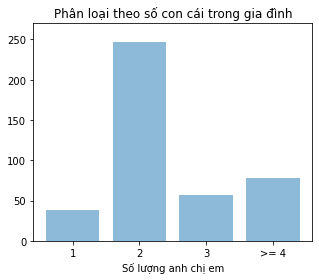

In [6]:
stype = data.groupby(['Sib']).size().reset_index(name='counts')
print(stype)
y_pos = np.arange(len(stype.Sib))
stype.Sib = ['1','2','3','>= 4']
plt.bar(y_pos, stype.counts, align='center', alpha=0.5)
plt.xticks(y_pos, stype.Sib)

plt.xlabel('Số lượng anh chị em')
plt.ylim([0,270])
plt.title('Phân loại theo số con cái trong gia đình')
plt.show()

([<matplotlib.axis.XTick at 0x1bd7530efd0>,
 [Text(0, 0, ' '),
  Text(1, 0, 'Công'),
  Text(2, 0, 'Chuyên'),
  Text(3, 0, 'Tư thục'),
  Text(4, 0, 'Quốc tế')])

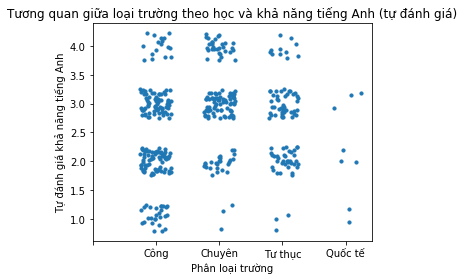

In [144]:
gender_w_noise = data.school_type +  0.5*np.random.random(len(data.Gender)) - 0.25
income_w_noise = data.English +  0.5*np.random.random(len(data.income)) - 0.25
plt.scatter(gender_w_noise, income_w_noise, s=10)
plt.xlabel('Phân loại trường')
plt.ylabel('Tự đánh giá khả năng tiếng Anh')
plt.title('Tương quan giữa loại trường theo học và khả năng tiếng Anh (tự đánh giá)')
stype = [' ','Công','Chuyên','Tư thục','Quốc tế']
y_pos = np.arange(len(stype))
plt.xticks(y_pos, stype)

Nhận xét:


Text(0.5, 1.0, 'Tương quan về mức độ tự đánh giá việc học theo khối thi và khả năng tiếng Anh')

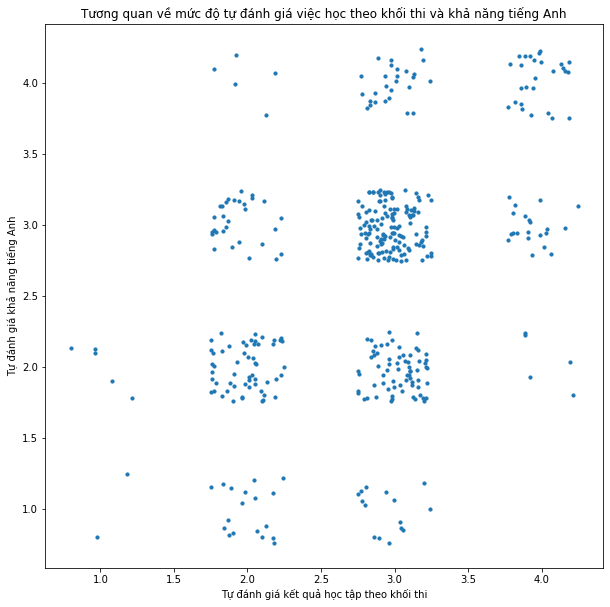

In [155]:
gender_w_noise = data.Self_evaluation +  0.5*np.random.random(len(data.Gender)) - 0.25
income_w_noise = data.English +  0.5*np.random.random(len(data.income)) - 0.25
plt.scatter(gender_w_noise, income_w_noise, s=10, cmap=data.LH_w_Instruction)
plt.xlabel('Tự đánh giá kết quả học tập theo khối thi')
plt.ylabel('Tự đánh giá khả năng tiếng Anh')
plt.title('Tương quan về mức độ tự đánh giá việc học theo khối thi và khả năng tiếng Anh')

Text(0.5, 1.0, 'Tương quan về mức độ tự đánh giá việc học theo khối thi và khả năng tiếng Anh')

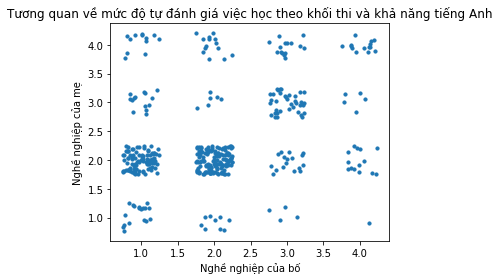

In [8]:
dataRep = data[data.Total_Online + data.Total_offline  <= 24]
gender_w_noise = dataRep.fa_job +  0.5*np.random.random(len(dataRep.Gender)) - 0.25
income_w_noise = dataRep.mo_job +  0.5*np.random.random(len(dataRep.income)) - 0.25
plt.scatter(gender_w_noise, income_w_noise, s=10)
plt.xlabel('Nghề nghiệp của bố')
plt.ylabel('Nghề nghiệp của mẹ')
plt.title('Nghề nghiệp bố mẹ học sinh')

## Thống kê mô tả và kiểm định giữa 2 khối về thời gian học##

,LH_w_Instruction,LHInstruction,Total_Online,Total_offline
0,4,0,2,2
1,0,0,0,0
2,5,0,1,4
3,10,0,5,5
4,3,0,1,2
...,...,...,...,...
415,0,0,0,0
416,6,0,3,3
417,5,0,5,0
418,2,5,4,3


In [212]:
grade_2 = data[data['Grade_level']==1]
grade_2_onl = grade_2[ grade_2['Total_Online']<=24]
grade_2_onl = grade_2_onl['Total_Online']
grade_3 = dataRep[data['Grade_level']==2]
grade_3_onl = grade_3[ grade_3['Total_Online']<=24]
grade_3_onl = grade_3_onl['Total_Online']
print('Số lượng học sinh cấp 2: ', len(grade_2_onl))
print('Số lượng học sinh cấp 3: ', len(grade_3_onl))

Số lượng học sinh cấp 2:  233
Số lượng học sinh cấp 3:  186
     stt  Gender  Class  Grade_level  school_type  Sib  fa_job  mo_job  \
0      1       1      4            1            2    2       1       2   
1      2       2      4            1            2    3       1       2   
2      3       1      4            1            2    2       2       2   
3      4       2      4            1            2    2       1       2   
4      5       3      4            1            2    2       1       2   
..   ...     ...    ...          ...          ...  ...     ...     ...   
412  418       1      2            1            3    2       2       2   
413  419       2      4            1            2    2       2       2   
414  420       1      2            1            2    2       2       2   
415  421       2      4            1            3    2       3       2   
418  424       1      1            1            3    4       1       2   

     income  exam  ...  eff_supp  eff_env  eff_obj 

In [ ]:
#Do 2 mẫu có số lượng lớn hơn 30 -> sử dụng kiếm định giả thuyết so sánh 2 trung bình (2 mẫu độc lập) bằng norm test
#Mức ý nghĩa alpha = 0.95

In [178]:
rslt_1 = st.norm.interval(alpha=0.95,loc=np.mean(grade_2_onl), scale=st.sem(grade_2_onl)) 
rslt_2 = st.norm.interval(alpha=0.95,loc=np.mean(grade_3_onl), scale=st.sem(grade_3_onl)) 
print('Grade 2')
print ('Mean: ',grade_2_onl.mean())
print ('Confident interval: ', rslt_1)
print('Grade 3')
print ('Mean: ',grade_3_onl.mean())
print ('Confident interval grade 3 online : ', rslt_2)

Grade 2
Mean:  2.7854077253218885
Confident interval:  (2.422500570001605, 3.148314880642172)
Grade 3
Mean:  2.5053763440860215
Confident interval grade 3 online :  (2.074307184232751, 2.936445503939292)


Text(0, 0.5, 'Số lượng')

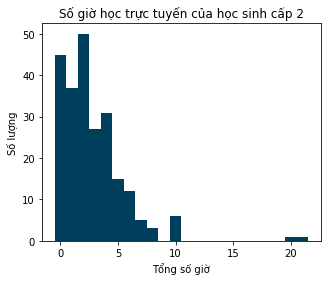

In [175]:
test = grade_2_onl.to_numpy()

d = np.diff(np.unique(test)).min()
left_of_first_bin = test.min() - float(d)/2
right_of_last_bin = test.max() + float(d)/2
plt.rcParams["figure.figsize"] = (5,4)

plt.hist(test, np.arange(left_of_first_bin, right_of_last_bin + d, d),label=True,color='#003F5C')
plt.title('Số giờ học trực tuyến của học sinh cấp 2')
plt.xlabel('Tổng số giờ')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

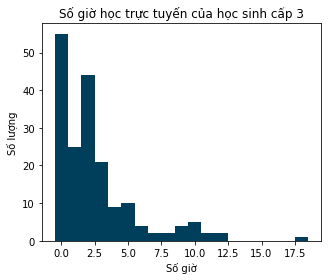

In [176]:
test = grade_3_onl.to_numpy()

d = np.diff(np.unique(test)).min()
left_of_first_bin = test.min() - float(d)/2
right_of_last_bin = test.max() + float(d)/2
plt.rcParams["figure.figsize"] = (5,4)

plt.hist(test, np.arange(left_of_first_bin, right_of_last_bin + d, d),label=True,color='#003F5C')
plt.title('Số giờ học trực tuyến của học sinh cấp 3')
plt.xlabel('Số giờ')
plt.ylabel('Số lượng')

Giả thuyết:

H0 : mean_2 = mean_3

H1 : mean_2 > mean_3
Mức ý nghĩa: alpha = 0.05


In [206]:
import statsmodels.stats.weightstats as ws
    
col1 = ws.DescrStatsW(grade_2_onl)
col2 = ws.DescrStatsW(grade_3_onl)
    
cm_obj = ws.CompareMeans(col1, col2)
    
zstat, z_pval = cm_obj.ztest_ind(alternative="larger",usevar="unequal")

print(zstat, z_pval)

0.9740196751121687 0.16502338510488457


Nhận xét:
- Vì p-value > alpha, do đó ta bác bỏ giả thuyết H0
- Kiểm định 2 trung bình mẫu độc lập cho thấy, thời gian học online trung bình của 2 khối không giống nhau, thời gian học online trung bình của khối cấp 2 (THCS) lớn hơn khối cấp 3 (THPT)

Tương tự, ta kiểm định thời gian học offline của 2 khối

In [209]:
grade_2 = data[data['Grade_level']==1]
grade_2_off = grade_2[ grade_2['Total_offline']<=24]
grade_2_off = grade_2_off['Total_Online']
grade_3 = dataRep[data['Grade_level']==2]
grade_3_off = grade_3[ grade_3['Total_offline']<=24]
grade_3_off = grade_3_off['Total_Online']
print('Số lượng học sinh cấp 2: ', len(grade_2_off))
print('Số lượng học sinh cấp 3: ', len(grade_3_off))

Số lượng học sinh cấp 2:  234
Số lượng học sinh cấp 3:  186


In [210]:
rslt_1 = st.norm.interval(alpha=0.95,loc=np.mean(grade_2_off), scale=st.sem(grade_2_off)) 
rslt_2 = st.norm.interval(alpha=0.95,loc=np.mean(grade_3_off), scale=st.sem(grade_3_off)) 
print('Grade 2')
print ('Mean: ',grade_2_off.mean())
print ('Confident interval: ', rslt_1)
print('Grade 3')
print ('Mean: ',grade_3_off.mean())
print ('Confident interval grade 3 online : ', rslt_2)

Grade 2
Mean:  2.9017094017094016
Confident interval:  (2.4744672833368058, 3.3289515200819975)
Grade 3
Mean:  2.5053763440860215
Confident interval grade 3 online :  (2.074307184232751, 2.936445503939292)


Giả thuyết:

H0 : mean_2 = mean_3

H1 : mean_2 > mean_3

Mức ý nghĩa: alpha = 0.05


In [211]:
col1 = ws.DescrStatsW(grade_2_off)
col2 = ws.DescrStatsW(grade_3_off)
    
cm_obj = ws.CompareMeans(col1, col2)
    
zstat, z_pval = cm_obj.ztest_ind(alternative="larger",usevar="unequal")

print(zstat, z_pval)

1.2798947286338938 0.10029108090087885


Nhận xét:
- Vì p-value > alpha, do đó ta bác bỏ giả thuyết H0
- Kiểm định 2 trung bình mẫu độc lập cho thấy, thời gian học offline trung bình của 2 khối không giống nhau, thời gian học offline trung bình của khối cấp 2 (THCS) lớn hơn khối cấp 3 (THPT)

Kết luận:
- Thông thường, chúng ta sẽ nghĩ rằng, thời gian học trung bình của học sinh cấp 2 sẽ nhỏ hơn thời gian học trung bình của học sinh cấp 3 (trực tuyến và trực tiếp)
- Tuy nhiên, từ kết quả cho thấy, có sự sai khác so với dự đoán ban đầu, sự sai khác này có thể xuất hiện do có dữ liệu bất thường từ một trường trong dữ liệu hoặc trong trường hợp này các mẫu khảo sát phản ánh kết quả khác so với mong đợi.
Ta tiến hành so sánh giữa các khối lớp.

In [285]:
classGroup = data[['Class','Total_Online','Total_offline']]
classGroup = classGroup[classGroup['Total_Online']<=24]
classGroup = classGroup[classGroup['Total_offline']<=24]
for index, row in classGroup.iterrows():
    row['Class'] += 5
classGroup = classGroup.groupby('Class').mean()
classGroup = classGroup.reset_index()
classGroup



,Class,Total_Online,Total_offline
0,6,3.425926,3.018519
1,7,3.184211,2.710526
2,8,5.000000,3.000000
3,9,2.257576,2.924242
4,10,2.327586,2.663793
5,11,2.800000,3.471429


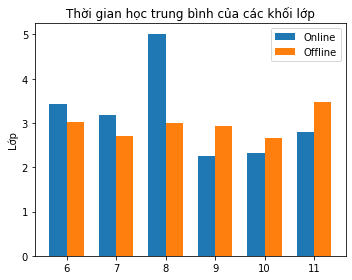

In [298]:


labels = classGroup.Class
men_means = classGroup.Total_Online
women_means = classGroup.Total_offline

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Online')
rects2 = ax.bar(x + width/2, women_means, width, label='Offline')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Thời gian')
ax.set_ylabel('Lớp')
ax.set_title('Thời gian học trung bình của các khối lớp')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

Nhận xét:
- Thời gian học online của khối lớp 8 thay đổi đột biến, cao hơn rất nhiều so với những khối lớp khád. Tuy nhiên, do số lượng được khảo sát chỉ có 8 học sinh, do đó độ tin cậy không cao.
- Thời gian học offline của khối lớp 11 là cao nhất, thời gian học online cũng cao hơn so với lớp 9 và lớp 10.
- Chúng ta không có số liệu của lớp 12, do đó có thể có nhiều khác biệt so với thực tế khi so sánh giữa các khối lớp

In [ ]:

Class_6 = data[data['Class']==1]
Class_6_onl = Class_6[ Class_6['Total_Online']<=24]
Class_6_onl = Class_6_onl['Total_Online']
Class_7 = data[data['Class']==2]
Class_7_onl = Class_7[ Class_7['Total_Online']<=24]
Class_7_onl = Class_7_onl['Total_Online']
Class_8 = data[data['Class']==3]
Class_8_onl = Class_8[ Class_8['Total_Online']<=24]
Class_8_onl = Class_8_onl['Total_Online']
Class_9 = data[data['Class']==4]
Class_9_onl = Class_9[ Class_9['Total_Online']<=24]
Class_9_onl = Class_9_onl['Total_Online']
Class_10 = data[data['Class']==5]
Class_10_onl = Class_10[ Class_10['Total_Online']<=24]
Class_10_onl = Class_10_onl['Total_Online']
Class_11 = data[data['Class']==6]
Class_11_onl = Class_11[ Class_11['Total_Online']<=24]
Class_11_onl = Class_11_onl['Total_Online']


Do đó, ta thử lập bảng so sánh trung bình, khoảng tin cậy 95% giữa các khối lớp

In [270]:
df = [Class_6_onl,Class_7_onl , Class_8_onl, Class_9_onl, Class_10_onl, Class_11_onl]

stat_table = pd.DataFrame()


for i in range(6):
    column_intvl = st.norm.interval(0.95,loc=np.mean(df[i]),scale=st.sem(df[i]))    
    stat_table[i+6] = pd.Series([column_intvl])

    

print('Với độ tin cậy 95%, ta có bảng ước lượng các giá trị trung bình  như sau:')
stat_table.rename(index={})

Với độ tin cậy 95%, ta có bảng ước lượng các giá trị trung bình  như sau:


,6,7,8,9,10,11
0,"(2.57677912963159, 4.275072722220262)","(2.1365706112374543, 4.2318504413941245)","(2.8579427769221, 7.1420572230779005)","(1.8578490875151057, 2.65730242763641)","(1.8074339069338157, 2.8477385068592875)","(2.0457969601129733, 3.5542030398870263)"


## TÌM HIỂU VỀ THỜI GIAN HỌC TỰ HỌC VỚI CÁC TRƯỜNG THÔNG TIN LIÊN QUAN

#####Mục tiêu: dự đoán số giờ tự học của học sinh thông qua các chỉ số khác (liên quan thông tin cá nhân và vi học tập của học sinh)####
Trước hết chúng ta thử vẽ một biểu đồ thể hiện mức độ tương quan giữa các biến về thói quen học tập (correlation matrix).. 

In [151]:
dataRep = data[['LH_w_Instruction','Gender','Class','school_type','Sib','fa_job','mo_job','income','Total_Online','Total_offline']]
#dataRep = data[['Grade_level','Total','LH_w_Instruction','Total_Online','onl_noninstr','Total_offline','off_noninstr','onl_instr','off_instr','LHInstruction']]

    

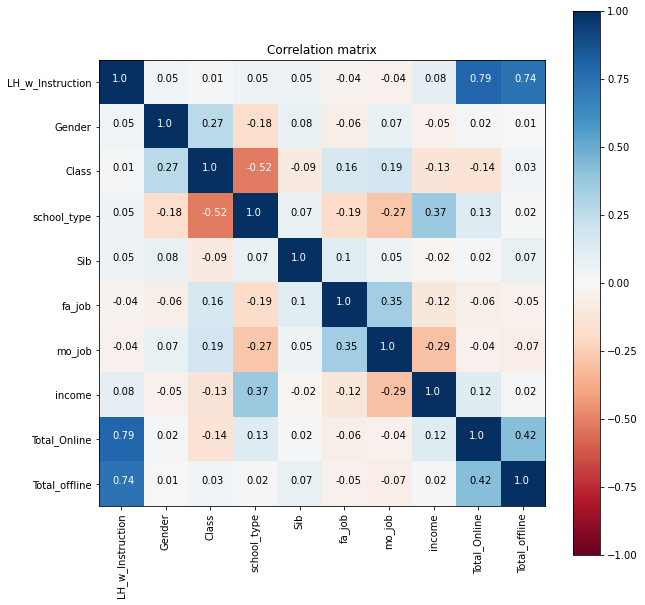

In [152]:
a=dataRep.iloc[:,0:10].corr()
plt.rcParams["figure.figsize"] = (10,10)
tick = a.columns
plt.imshow(a, interpolation='nearest', cmap=plt.cm.RdBu, vmin=-1)
plt.title('Correlation matrix')
plt.colorbar()
tick_marks = np.arange(len(tick))
plt.xticks(tick_marks, tick, rotation=90)
plt.yticks(tick_marks, tick)
#show value
iters = np.reshape([[[i,j] for j in range(10)] for i in range(10)],(a.size,2))
a=a.to_numpy()
for i, j in iters:
        if(abs(a[i, j]) < 0.5):
            plt.text(j, i, a[i, j].round(2), position=(i-0.2,j), color='black') 
        else:
            plt.text(j, i, a[i, j].round(2), position=(i-0.2,j), color='white')
 

Ta có thể thấy, mức độ tương quan giữa thời gian tự học và tổng thời gian học trực tiếp/trực tuyến có độ tương quan cao nhất.
Khi phân tích độ tương quan theo mô hình hồi quy tuyến tính đơn, giá trị R-squared thu được khá tốt.
Các biến còn lại về thông tin cá nhân (không liên quan đến thời gian học, bao gồm giới tính, lớp, loại trường, số anh chị em, nghề nghiệp bố/mẹ, thu nhập), độ tương quan không quá cao (do phần lớp là các biến đã được 'mã hóa' thành số theo các quy định )

In [121]:
x = data[['Total_Online']]
y = data['LH_w_Instruction']
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print(est.summary())
print('P-value: \n', est.pvalues)

                            OLS Regression Results                            
Dep. Variable:       LH_w_Instruction   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     713.2
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           2.14e-92
Time:                        15:46:51   Log-Likelihood:                -1010.9
No. Observations:                 420   AIC:                             2026.
Df Residuals:                     418   BIC:                             2034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3246      0.173      7.664   

In [120]:
x = data[['Total_offline']]
y = data['LH_w_Instruction']
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print(est.summary())
print('P-value: \n', est.pvalues)

                            OLS Regression Results                            
Dep. Variable:       LH_w_Instruction   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     501.4
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.49e-73
Time:                        15:46:31   Log-Likelihood:                -1054.5
No. Observations:                 420   AIC:                             2113.
Df Residuals:                     418   BIC:                             2121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9378      0.210      4.466

In [149]:
x = data[['school_type']]
y = data['LH_w_Instruction']
X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print(est.summary())
print('P-value: \n', est.pvalues)

                            OLS Regression Results                            
Dep. Variable:       LH_w_Instruction   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9794
Date:                Fri, 16 Jul 2021   Prob (F-statistic):              0.323
Time:                        16:12:52   Log-Likelihood:                -1219.5
No. Observations:                 420   AIC:                             2443.
Df Residuals:                     418   BIC:                             2451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8627      0.514      7.521      

In [ ]:
Chúng ta có 1 kỳ vọng rằng, nếu thời gian học tập (trực tiếp, trực tuyến) càng cao thì thời gian tự học càng cao. Bên cạnh đó, giá trị tương quan giữa thời gian học tập trực tiếp và trực tuyến có độ tương quan không quá cao (xem lại correlation matrix)
Do đó, ta thử nghiệm mô hình hồi quy tuyến tính bội dựa trên 2 biến là thời gian học tập trực tiếp và trực tuyến để dự đoán giá trị của biến thời gian tự học của từng học sinh

In [153]:
x = data[['Total_Online', 'Total_offline', 'school_type']]

y = data['LH_w_Instruction']
y

X = sm.add_constant(x)
est = sm.OLS(y, X).fit()
print(est.summary())
print(est.pvalues)

                            OLS Regression Results                            
Dep. Variable:       LH_w_Instruction   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     671.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):          5.87e-159
Time:                        16:17:28   Log-Likelihood:                -849.43
No. Observations:                 420   AIC:                             1707.
Df Residuals:                     416   BIC:                             1723.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2130      0.232      0.919

Xem xét rõ hơn giá trị pvalue


In [158]:
print(est.pvalues)
print('f-pvalue: ',est.f_pvalue)

const            3.586299e-01
Total_Online     5.515564e-90
Total_offline    1.079251e-70
school_type      6.336500e-02
dtype: float64
f-pvalue:  5.865775775918029e-159


Ta có thể thấy, việc kết hợp 2 biến đã nâng giá trị r-squared lên mức khá cao (Adj. R-squared: 0.826).
Ta có thể đi đến kết luận sau:
- Biến Total_Online, Total_offline có ý nghĩa về mặt thống kê (p-value < 10^(-70))
- Mô hình có thể giải thích được 82,8% sự thay đổi của biến LH_w_instr (thời gian tự học)
- Mô hình khá tốt (p-value = 5.8658e-159)
